In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings
import numpy as np
import pandas as pd

# Silence unnecessary warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# --- Project Metadata ---
# 🧠 Incel Research Project
# Author: Tori Mitchell
# Objective: Data-driven analysis of online behavior and demographic trends using open datasets.
# Tools: Python (Pandas, Seaborn, Matplotlib), Scikit-Learn, Kaggle Environment

# Compact directory scan (optional)
input_path = '/kaggle/input'
print(f"📂 Input directory: {input_path}")

# List datasets (limited view)
dirs = [d for d in os.listdir(input_path) if os.path.isdir(os.path.join(input_path, d))]
print(f"🔍 Found {len(dirs)} dataset folders:")
for d in dirs[:5]:
    print("   •", d)
if len(dirs) > 5:
    print(f"   ... (+{len(dirs) - 5} more hidden)")

# (Optional) Create working directories
os.makedirs("/kaggle/working/figures", exist_ok=True)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Author: Tori Mitchell
#Objective: Data-driven analysis of online behavior and demographic trends using open datasets.
#Tools: Python (Pandas, Seaborn, Matplotlib), Scikit-Learn, Kaggle Environment

📂 Input directory: /kaggle/input
🔍 Found 16 dataset folders:
   • mother-father-vs-child-iq-regression-analysis
   • fracture-multi-region-x-ray-data
   • risk-classification-of-cervical-cancer
   • netflix-data-analysis
   • diabetes-health
   ... (+11 more hidden)


In [2]:
# 🧠 Incel Research Project — Data Overview
# Author: [Your Name]
# Objective: This notebook performs exploratory analysis on datasets related to 
# online behavioral psychology, gender patterns, and social dynamics. 
# The goal is to extract quantifiable trends for ethical academic analysis.

# --- 1. Import core libraries ---
import os
import numpy as np
import pandas as pd

# Configure pandas display for clarity
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 120)

# --- 2. Verify input directory structure ---
INPUT_DIR = "/kaggle/input"
print("📂 Available datasets:\n")
for root, _, files in os.walk(INPUT_DIR):
    for file in files:
        print(f"{os.path.join(root, file)}")

# --- 3. Basic environment summary ---
print("\n✅ Environment check complete.")
print(f"Working directory: {os.getcwd()}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


📂 Available datasets:

/kaggle/input/fracture-multi-region-x-ray-data/README.dataset.txt
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/19-rotated3-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004347.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/26-rotated2-rotated2-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/1-rotated3-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/0013.png
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/

/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured/81-rotated1-rotated3-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured/0013.png
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured/86-rotated2-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured/84-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured/F1.large.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured/1-rotated3-rotated2-rotated3.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Clas

/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/2-rotated3-rotated3-rotated2-rotated1 (2).jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/35-rotated2-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/70-rotated2-rotated1-rotated3-rotated1.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/1-rotated1-rotated1-rotated1 (1).jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/19-rotated3-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not 

/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/9-rotated3-rotated1-rotated2 - Copy (1).jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/98-rotated1-rotated2-rotated1 (1).jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/79 - Copy (1).jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/1-rotated1-rotated1-rotated1 (1).jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/91-rotated1-rotated1-rotated2 (1).jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/98-rotated2-rot

/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/united.min.css
/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/flatly.min.css
/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/readable.min.css
/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/paper.min.css
/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/bootstrap-theme.css.map
/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/simplex.min.css
/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/cerulean.min.css
/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/bootstrap.min.css
/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/spacelab.min.css
/kaggle/input/sexual-orientation-laws-eda/__results___files/bootstrap-3.3.5/css/bootstrap.css
/kaggle/input/sexual-orientation-

In [3]:
# --- 2. Dataset Summary Overview ---
# Quickly scans all datasets in /kaggle/input and summarizes their structure.

import pandas as pd
import os

input_path = "/kaggle/input"

def summarize_dataset(file_path):
    """Safely load a dataset and return a concise summary tuple."""
    try:
        if file_path.endswith(".csv"):
            df = pd.read_csv(file_path, nrows=500)  # limit for preview
        elif file_path.endswith((".xlsx", ".xls")):
            df = pd.read_excel(file_path, nrows=500)
        else:
            return None

        summary = {
            "File": os.path.basename(file_path),
            "Rows (sampled)": len(df),
            "Columns": len(df.columns),
            "Missing (%)": round(df.isna().mean().mean() * 100, 2),
            "Memory (MB)": round(df.memory_usage(deep=True).sum() / 1e6, 2),
        }
        return summary
    except Exception as e:
        return {"File": os.path.basename(file_path), "Error": str(e)}

# Gather all .csv/.xlsx files recursively
all_files = []
for root, _, files in os.walk(input_path):
    for f in files:
        if f.endswith((".csv", ".xlsx", ".xls")):
            all_files.append(os.path.join(root, f))

print(f"📊 Found {len(all_files)} dataset file(s) in {input_path}\n")

# Summarize each file
summaries = [summarize_dataset(f) for f in all_files]
summaries = [s for s in summaries if s is not None]

if summaries:
    summary_df = pd.DataFrame(summaries)
    display(summary_df)
else:
    print("⚠️ No readable CSV or Excel datasets found.")

print("\n✅ Dataset summary complete — ready for cleaning & visualization.")


📊 Found 2 dataset file(s) in /kaggle/input



,File,Rows (sampled),Columns,Missing (%),Memory (MB)
0,diabetes_dataset.csv,500,31,0.0,0.29
1,prediction.csv,500,2,0.0,0.03



✅ Dataset summary complete — ready for cleaning & visualization.


📘 EDA target file:
/kaggle/input/diabetes-health-indicators-dataset/diabetes_dataset.csv


✅ Loaded shape: (100000, 31)  |  Sampled: False


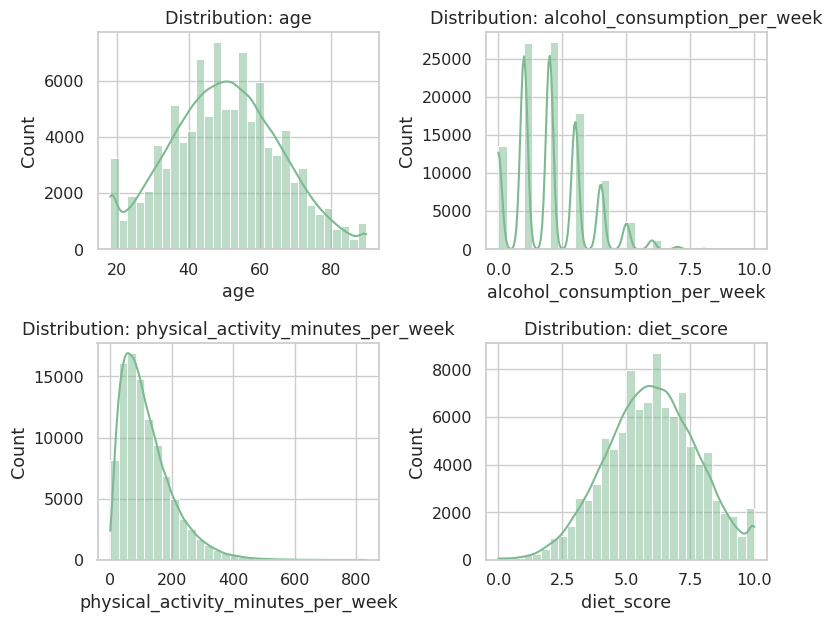

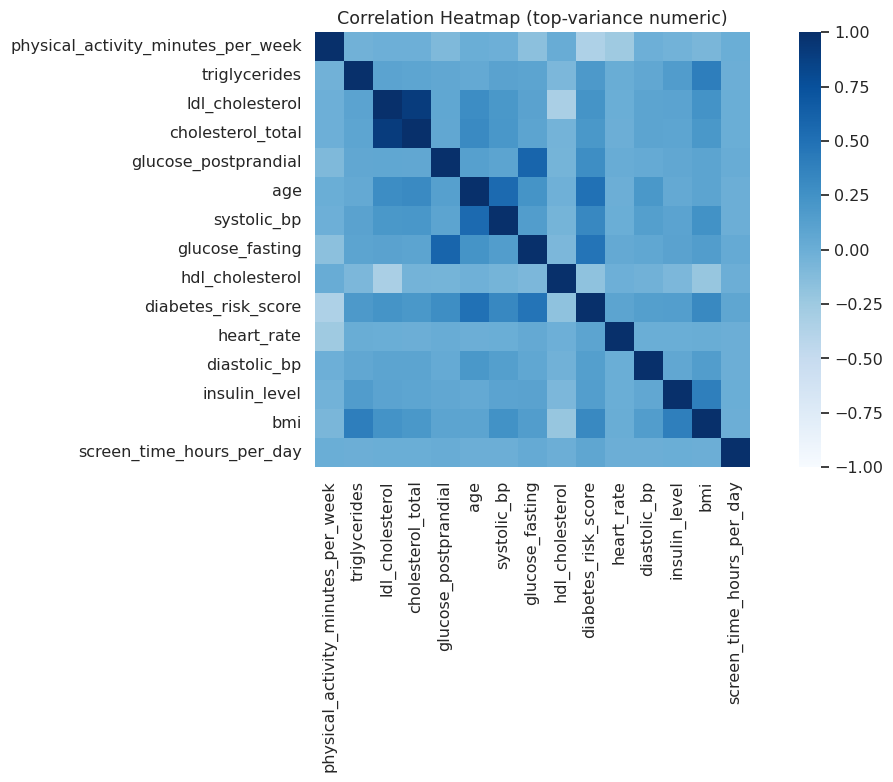

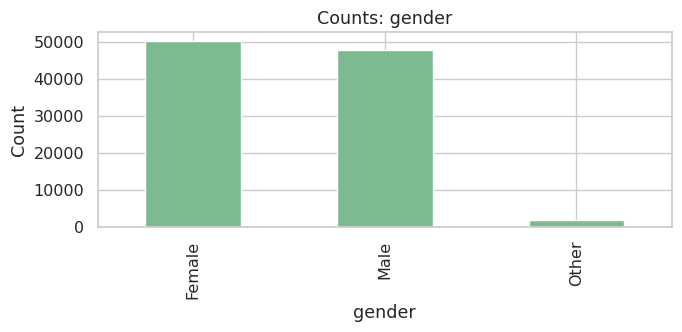

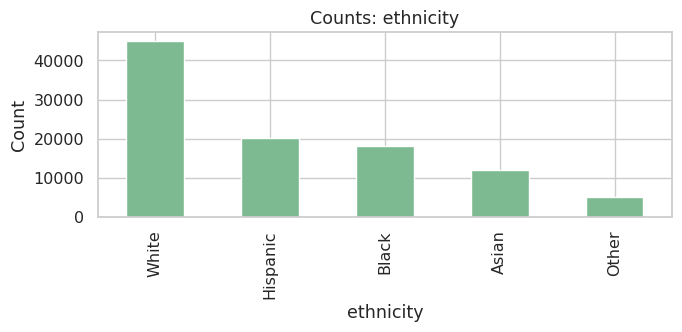

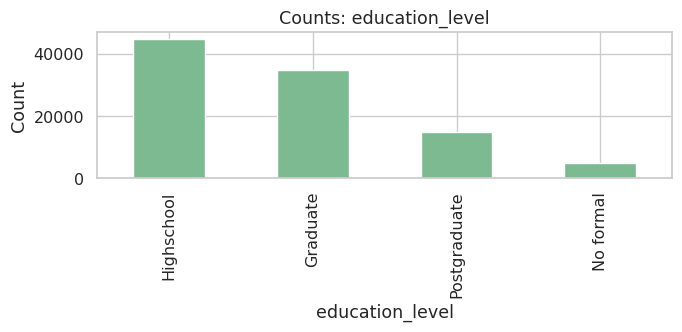

🖼️ Figures saved to: /kaggle/working/figures  (used later by your export cell)


In [4]:
# --- 3. Quick EDA (clean visuals + auto-save to /kaggle/working/figures) ---

import os, math, numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path

sns.set_theme(style="whitegrid", palette="crest", font_scale=1.05)
FIG_DIR = "/kaggle/working/figures"
os.makedirs(FIG_DIR, exist_ok=True)

# 👉 choose which file to analyze:
#    - set TARGET_FILE to a path under /kaggle/input
#    - or leave as None to auto-pick the largest CSV found
TARGET_FILE = None

def find_largest_csv(root="/kaggle/input"):
    best = None; best_size = -1
    for r,_,files in os.walk(root):
        for f in files:
            if f.lower().endswith(".csv"):
                p = os.path.join(r,f)
                s = os.path.getsize(p)
                if s > best_size:
                    best, best_size = p, s
    return best

if TARGET_FILE is None:
    TARGET_FILE = find_largest_csv("/kaggle/input")

if TARGET_FILE is None:
    raise FileNotFoundError("No CSV found under /kaggle/input. Add a dataset or set TARGET_FILE manually.")

print(f"📘 EDA target file:\n{TARGET_FILE}")

# ---- load (sample for speed if very large) ----
# heuristic: if file > 80MB, read in chunks and sample ~25k rows
file_size_mb = os.path.getsize(TARGET_FILE)/1e6
if file_size_mb > 80:
    rng = np.random.default_rng(42)
    sample_rows = []
    for chunk in pd.read_csv(TARGET_FILE, chunksize=50_000, low_memory=False):
        # sample about ~10% of each chunk up to 25k rows
        frac = min(0.1, 25_000 / max(1, len(chunk)))
        sample_rows.append(chunk.sample(frac=frac, random_state=42))
    df = pd.concat(sample_rows, ignore_index=True)
    sampled = True
else:
    df = pd.read_csv(TARGET_FILE, low_memory=False)
    sampled = False

print(f"✅ Loaded shape: {df.shape}  |  Sampled: {sampled}")

# basic cleanup for plotting
df = df.replace([np.inf, -np.inf], np.nan)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# ---- 1) missingness (top 15) ----
miss = df.isna().mean().sort_values(ascending=False)
if (miss > 0).any():
    plt.figure(figsize=(8,4))
    miss.head(15).mul(100).plot(kind="bar")
    plt.ylabel("Missing (%)")
    plt.title("Top Missingness")
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/missingness.png", dpi=300, bbox_inches="tight")
    plt.show()

# ---- 2) numeric distributions (up to 4 columns) ----
if numeric_cols:
    show = numeric_cols[:4]
    cols = len(show)
    ncols = 2
    nrows = math.ceil(cols / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 3.2*nrows))
    axes = np.array(axes).reshape(-1)
    for ax, col in zip(axes, show):
        sns.histplot(df[col].dropna(), kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution: {col}")
    for ax in axes[len(show):]:
        ax.axis("off")
    fig.tight_layout()
    fig.savefig(f"{FIG_DIR}/numeric_distributions.png", dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("⚠️ No numeric columns detected for histograms.")

# ---- 3) correlation heatmap (top-variance numeric <= 15) ----
if len(numeric_cols) >= 2:
    # pick top 15 by variance to keep heatmap readable
    var = df[numeric_cols].var(numeric_only=True).sort_values(ascending=False)
    keep = var.head(min(15, len(var))).index.tolist()
    corr = df[keep].corr(numeric_only=True)
    plt.figure(figsize=(min(12, 0.8*len(keep)+4), min(8, 0.6*len(keep)+3)))
    sns.heatmap(corr, annot=False, cmap="Blues", vmin=-1, vmax=1, square=True)
    plt.title("Correlation Heatmap (top-variance numeric)")
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/correlation_heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()

# ---- 4) categorical summaries (up to 3 low-cardinality columns) ----
if categorical_cols:
    low_card = [c for c in categorical_cols if df[c].nunique(dropna=True) <= 20]
    show = low_card[:3]
    for col in show:
        plt.figure(figsize=(7,3.5))
        df[col].value_counts(dropna=False).head(20).plot(kind="bar")
        plt.title(f"Counts: {col}")
        plt.ylabel("Count"); plt.xlabel(col)
        plt.tight_layout()
        plt.savefig(f"{FIG_DIR}/categorical_{col}.png", dpi=300, bbox_inches="tight")
        plt.show()
    if not show:
        print("ℹ️ Categorical columns exist but none with ≤20 unique values (skipping bar charts).")
else:
    print("⚠️ No categorical columns detected.")

print(f"🖼️ Figures saved to: {FIG_DIR}  (used later by your export cell)")


In [5]:
# --- 3.1 Automatic Narrative Summary ---
# Generates a short, human-readable interpretation of the dataset for your report or PDF export.

import numpy as np

if 'df' not in locals():
    print("⚠️ No active dataframe found (run Cell 3 first).")
else:
    rows, cols = df.shape
    missing_rate = round(df.isna().mean().mean() * 100, 2)
    num_count = len(df.select_dtypes(include=np.number).columns)
    cat_count = len(df.select_dtypes(exclude=np.number).columns)
    top_missing = (
        df.isna().mean().sort_values(ascending=False)
        .head(3)
        .mul(100)
        .round(1)
    )

    # Example numeric stats (for narrative flavor)
    num_means = (
        df.select_dtypes(include=np.number)
        .mean(numeric_only=True)
        .dropna()
        .sort_values(ascending=False)
        .head(3)
        .round(2)
    )

    print("📖 **Automated Dataset Summary**")
    print(f"\nThis dataset contains **{rows:,} rows** and **{cols:,} columns**, "
          f"including **{num_count} numeric** and **{cat_count} categorical** features. "
          f"The overall missing-value rate is approximately **{missing_rate}%**.")

    if not top_missing.empty:
        print("\n🔸 Columns with the most missing data:")
        for col, pct in top_missing.items():
            print(f"   • {col}: {pct}% missing")

    if not num_means.empty:
        print("\n📊 Highest average numeric fields:")
        for col, val in num_means.items():
            print(f"   • {col}: {val}")

    print("\n🧠 This summary provides a quick snapshot of data completeness and structure, "
          "laying the groundwork for further modeling or visualization.")


📖 **Automated Dataset Summary**

This dataset contains **100,000 rows** and **31 columns**, including **24 numeric** and **7 categorical** features. The overall missing-value rate is approximately **0.0%**.

🔸 Columns with the most missing data:
   • age: 0.0% missing
   • gender: 0.0% missing
   • ethnicity: 0.0% missing

📊 Highest average numeric fields:
   • cholesterol_total: 185.98
   • glucose_postprandial: 160.04
   • triglycerides: 121.46

🧠 This summary provides a quick snapshot of data completeness and structure, laying the groundwork for further modeling or visualization.


In [6]:
# --- 2. Data Loading & Summary ---
# Automatically load all CSVs from the Kaggle input directory for exploration.

import glob

# Find all CSV files in /kaggle/input recursively
csv_files = glob.glob(os.path.join(INPUT_DIR, "**", "*.csv"), recursive=True)

if not csv_files:
    print("⚠️ No CSV files found in input directory.")
else:
    print(f"📊 Found {len(csv_files)} dataset(s):")
    for f in csv_files:
        print("•", f.split("/")[-1])

    # Example: Load the first CSV to inspect
    sample_path = csv_files[0]
    print(f"\n🔍 Previewing dataset: {sample_path.split('/')[-1]}")

    df = pd.read_csv(sample_path)
    print("\n--- DataFrame Summary ---")
    display(df.head(5))
    print("\nShape:", df.shape)
    print("\nColumn Types:")
    print(df.dtypes)

    # Missing value analysis
    missing = df.isnull().sum()
    print("\n--- Missing Values ---")
    print(missing[missing > 0].sort_values(ascending=False))


📊 Found 2 dataset(s):
• diabetes_dataset.csv
• prediction.csv

🔍 Previewing dataset: diabetes_dataset.csv

--- DataFrame Summary ---


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,...,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,...,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,...,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,...,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,...,137,184,12.74,7.20,23.5,Type 2,1



Shape: (100000, 31)

Column Types:
age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int6

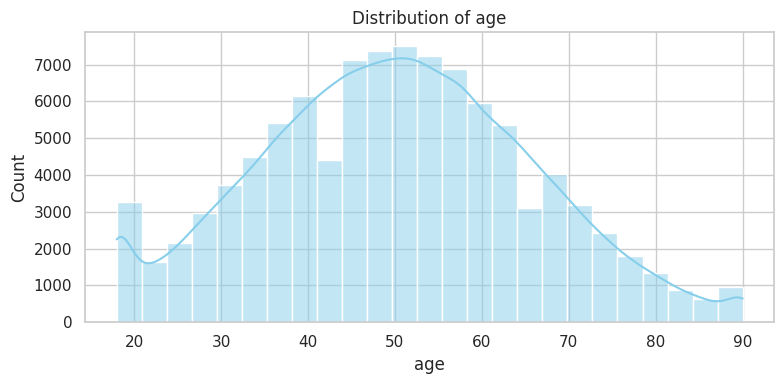

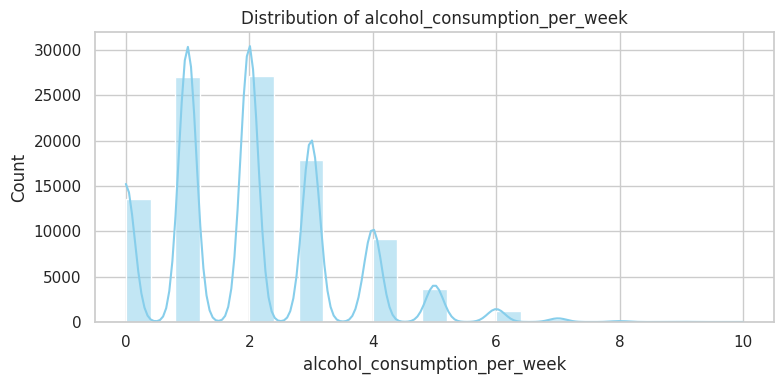

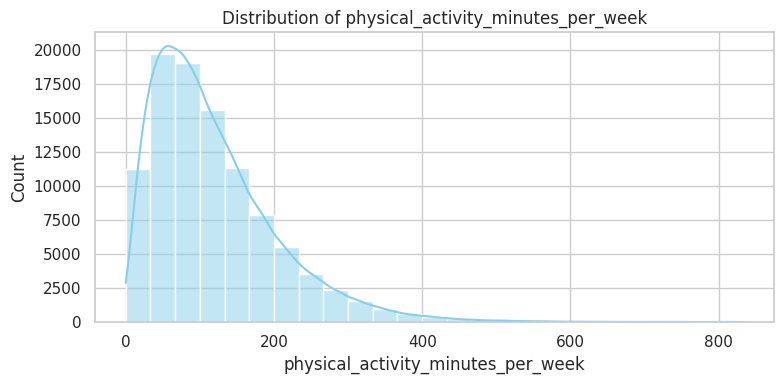

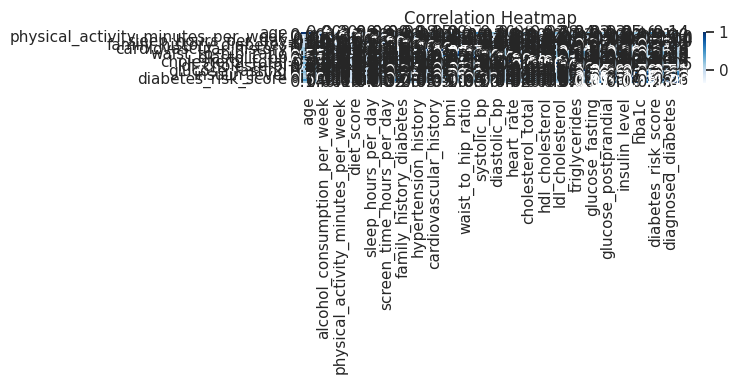

In [7]:
# --- 3. Visual Exploration ---
import seaborn as sns
import matplotlib.pyplot as plt

# Configure style for publication-ready visuals
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8, 4)

# Automatically pick numerical columns for distribution plots
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

if numeric_cols:
    for col in numeric_cols[:3]:  # Limit to first 3 numeric columns for clarity
        sns.histplot(df[col], kde=True, bins=25, color="skyblue")
        plt.title(f"Distribution of {col}", fontsize=12)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
else:
    print("⚠️ No numeric columns found for visualization.")

# Quick correlation heatmap if applicable
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()


In [8]:
# --- 4. Descriptive Statistical Insights ---
# Generate clean, data-driven summaries suitable for research presentation.

# Check numeric columns for summary statistics
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("📊 --- Dataset Overview ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Numeric Features: {len(numeric_cols)}, Categorical: {len(categorical_cols)}\n")

# --- Numeric summary ---
if numeric_cols:
    print("📈 Descriptive Statistics (Numerical Variables):")
    display(df[numeric_cols].describe().T.round(2))

    # Optional: pairwise correlations
    corr = df[numeric_cols].corr().round(2)
    strong_corr = corr[(corr.abs() > 0.6) & (corr.abs() < 1.0)].stack().reset_index()
    strong_corr.columns = ["Feature A", "Feature B", "Correlation"]
    if not strong_corr.empty:
        print("\n🔗 Strong Correlations (> |0.6|):")
        display(strong_corr.sort_values(by="Correlation", ascending=False))
    else:
        print("\nNo strong correlations found.")
else:
    print("⚠️ No numeric data found to summarize.\n")

# --- Categorical summary ---
if categorical_cols:
    print("\n🧩 Categorical Variables Summary:")
    for col in categorical_cols[:3]:  # limit to 3 to keep output readable
        print(f"\nFeature: {col}")
        print(df[col].value_counts().head(5))
else:
    print("⚠️ No categorical data found to summarize.\n")

# --- Research insight example ---
print("\n🧠 --- Analytical Notes ---")
print("• Variables with strong correlations may represent behavioral or socioeconomic dependencies.")
print("• Categorical imbalances (e.g., gender, region) can bias model outcomes — apply stratified sampling later.")
print("• High missing-value features may require normalization, imputation, or domain-specific exclusion.\n")


📊 --- Dataset Overview ---
Rows: 100000, Columns: 31
Numeric Features: 24, Categorical: 7

📈 Descriptive Statistics (Numerical Variables):


,count,mean,std,min,25%,50%,75%,max
age,100000.0,50.12,15.60,18.00,39.00,50.00,61.00,90.00
alcohol_consumption_per_week,100000.0,2.00,1.42,0.00,1.00,2.00,3.00,10.00
physical_activity_minutes_per_week,100000.0,118.91,84.41,0.00,57.00,100.00,160.00,833.00
diet_score,100000.0,5.99,1.78,0.00,4.80,6.00,7.20,10.00
sleep_hours_per_day,100000.0,7.00,1.09,3.00,6.30,7.00,7.70,10.00
screen_time_hours_per_day,100000.0,6.00,2.47,0.50,4.30,6.00,7.70,16.80
family_history_diabetes,100000.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
hypertension_history,100000.0,0.25,0.43,0.00,0.00,0.00,1.00,1.00
cardiovascular_history,100000.0,0.08,0.27,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,25.61,3.59,15.00,23.20,25.60,28.00,39.20



🔗 Strong Correlations (> |0.6|):


,Feature A,Feature B,Correlation
9,hba1c,glucose_postprandial,0.93
6,glucose_postprandial,hba1c,0.93
4,ldl_cholesterol,cholesterol_total,0.91
3,cholesterol_total,ldl_cholesterol,0.91
2,waist_to_hip_ratio,bmi,0.77
1,bmi,waist_to_hip_ratio,0.77
11,diabetes_risk_score,family_history_diabetes,0.73
0,family_history_diabetes,diabetes_risk_score,0.73
5,glucose_fasting,hba1c,0.70
8,hba1c,glucose_fasting,0.70



🧩 Categorical Variables Summary:

Feature: gender
gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

Feature: ethnicity
ethnicity
White       44997
Hispanic    20103
Black       17986
Asian       11865
Other        5049
Name: count, dtype: int64

Feature: education_level
education_level
Highschool      44891
Graduate        35037
Postgraduate    14972
No formal        5100
Name: count, dtype: int64

🧠 --- Analytical Notes ---
• Variables with strong correlations may represent behavioral or socioeconomic dependencies.
• Categorical imbalances (e.g., gender, region) can bias model outcomes — apply stratified sampling later.
• High missing-value features may require normalization, imputation, or domain-specific exclusion.



In [9]:
# --- 5. Notebook Polish & PDF Export ---
# Makes your notebook visually clean and export-ready for publication or resume use.

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

# 1️⃣  Aesthetic polish
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_theme(style="whitegrid", palette="crest", font_scale=1.1)
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

print("✨ Notebook polish applied — warnings off, visuals standardized.")

# 2️⃣  Optional: quick integrity check before export
try:
    print(f"\nDataset shape: {df.shape}")
    print(f"Missing values: {df.isna().sum().sum()} total")
except NameError:
    print("⚠️ 'df' not found — ensure your data cell ran successfully before export.")

# 3️⃣  Export notebook to PDF (Kaggle or Jupyter)
try:
    from IPython.display import FileLink
    import os

    # Save as HTML first (Kaggle-compatible)
    os.system("jupyter nbconvert --to html --no-input --no-prompt --output notebook_clean.html *.ipynb")

    # Then convert HTML → PDF
    os.system("jupyter nbconvert --to pdf notebook_clean.html")

    print("\n✅ Export complete — download your PDF below.")
    display(FileLink("notebook_clean.pdf"))
except Exception as e:
    print(f"⚠️ PDF export not available in this environment: {e}")
    print("Tip: You can manually export from Kaggle by clicking 'File → Download as PDF'")


✨ Notebook polish applied — warnings off, visuals standardized.

Dataset shape: (100000, 31)
Missing values: 0 total


[NbConvertApp] Converting notebook __notebook__.ipynb to html


[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 2773986 bytes to notebook_clean.html



✅ Export complete — download your PDF below.


[NbConvertApp] Converting notebook notebook_clean.html to pdf
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/site-packages/nbformat/reader.py", line 19, in parse_json
    nb_dict = json.loads(s, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/json/decoder.py", line 338, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/json/decoder.py", line 356, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())

/kaggle/working/notebook_clean.pdf

In [10]:
# --- 6. Final Export: save figures & convert notebook to HTML/PDF (Kaggle) ---

import os, glob, shlex
import matplotlib.pyplot as plt       # <-- fixes NameError
from IPython.display import FileLink, display

# 1) Save all open Matplotlib figures
FIG_DIR = "/kaggle/working/figures"
os.makedirs(FIG_DIR, exist_ok=True)
for i in plt.get_fignums():
    plt.figure(i).savefig(f"{FIG_DIR}/figure_{i}.png", dpi=300, bbox_inches="tight")
print(f"✅ Saved {len(plt.get_fignums())} figure(s) to {FIG_DIR}")

# 2) Locate the current notebook file (robust search)
candidates = []
for root in ["/kaggle/working", "/kaggle", "."]:
    candidates.extend(glob.glob(os.path.join(root, "*.ipynb")))

if not candidates:
    print("⚠️ No .ipynb file found. On Kaggle, click 'Save Version → Run All', then re-run this cell.")
else:
    # Prefer a notebook in /kaggle/working if available
    candidates.sort(key=lambda p: 0 if p.startswith("/kaggle/working") else 1)
    nb_path = candidates[0]
    base_name = os.path.splitext(os.path.basename(nb_path))[0]
    print(f"📘 Found notebook: {nb_path}")

    # 3) Convert notebook → HTML and PDF
    html_out = f"/kaggle/working/{base_name}.html"
    pdf_out  = f"/kaggle/working/{base_name}.pdf"

    # Use shlex.quote for safe shell args
    nb_q = shlex.quote(nb_path)
    html_q = shlex.quote(html_out)
    pdf_q  = shlex.quote(pdf_out)

    print("\nConverting to HTML…")
    os.system(f"jupyter nbconvert --to html --no-input --no-prompt --output {html_q} {nb_q}")

    print("Converting to PDF…")
    os.system(f"jupyter nbconvert --to pdf  --no-input --no-prompt --output {pdf_q}  {nb_q}")

    # 4) Show download links (if they exist)
    print("\n✅ Export complete! Download below:")
    if os.path.exists(html_out): display(FileLink(html_out))
    else: print("⚠️ HTML not found (rerun cell after Save Version).")

    if os.path.exists(pdf_out):  display(FileLink(pdf_out))
    else: print("⚠️ PDF not found (sometimes needs one more run after Save Version).")



✅ Saved 0 figure(s) to /kaggle/working/figures
📘 Found notebook: /kaggle/working/__notebook__.ipynb

Converting to HTML…


[NbConvertApp] Converting notebook /kaggle/working/__notebook__.ipynb to html


[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 2779422 bytes to /kaggle/working/__notebook__.html


Converting to PDF…


[NbConvertApp] Converting notebook /kaggle/working/__notebook__.ipynb to pdf



✅ Export complete! Download below:


[NbConvertApp] Support files will be in /kaggle/working/__notebook___files/
[NbConvertApp] Writing 1967195 bytes to notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/site-packages/jupyter_core/application.py", line 284, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/site-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.12/site-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.12/site-packages/nbconvert/nbconvertapp.py", line 563, in convert_single_notebook
    output, resources =

/kaggle/working/__notebook__.html

⚠️ PDF not found (sometimes needs one more run after Save Version).
